In [52]:
import cv2
import numpy as np
import cmath
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import Image
%matplotlib inline


# Problem1: Two Dimensional Convolution
## a) Conv2 implementation from scratch

In [57]:
def pad_image(image, pad = 0, w_row = 0, w_col = 0):

    '''Bottom right pixel is considered as center for 2x2 kernel.
    pad = 0, zero padding
    pad = 1, wrap around
    pad = 2, copy edge
    pad = 3, reflect across edge'''
    
    #row padding values corresponding to different kernel sizes
    top_row_padding = int(np.ceil((w_row-1)/2))
    bottom_row_padding = int(np.floor((w_row-1)/2))
    
    #col padding values corresponding to different kernel sizes
    left_col_padding = int(np.ceil((w_col-1)/2))
    right_col_padding = int(np.floor((w_col-1)/2))
    
    #pad = 0, zero padding
    #By default zero padding is implemented and when the 'pad' has a different value, 
    #then it goes through the if statements below and makes the necessary changes   
    padded_dimensions = (image.shape[0] + top_row_padding + bottom_row_padding, 
                   image.shape[1] + left_col_padding + right_col_padding)


    padded_image = np.zeros(padded_dimensions)


    #inserting original to padded image
    padded_image[top_row_padding : top_row_padding + image.shape[0], 
                 left_col_padding : left_col_padding + image.shape[1]] = image
        
    if pad == 1:   #pad = 1, wrap around        
        
        #top row padding
        if top_row_padding != 0:
            padded_image[0:top_row_padding,:]=padded_image[-1*(top_row_padding
                                                            +bottom_row_padding):top_row_padding+image.shape[0],:]
        #bottom row padding
        if bottom_row_padding != 0:
            padded_image[-1*(bottom_row_padding) : , : ] = padded_image[top_row_padding : top_row_padding
                                                                        + bottom_row_padding, :]
        #right column padding
        if right_col_padding != 0:
            padded_image[ : ,-1*(right_col_padding) : ] = padded_image[ : ,left_col_padding : left_col_padding
                                                                       + right_col_padding]
        #left column padding
        if left_col_padding != 0:
            padded_image[ : ,0 : left_col_padding] = padded_image[ : ,-1*(left_col_padding+right_col_padding) : 
                                                                  left_col_padding + image.shape[1]]
    
    elif pad == 2:    #pad = 2, copy edge        
        
        #top row padding
        if top_row_padding != 0:
            padded_image[0 : top_row_padding, : ] = padded_image[[top_row_padding], : ]
        #bottom row padding
        if bottom_row_padding != 0:
            padded_image[-1*(bottom_row_padding) : , : ] = padded_image[[-1*bottom_row_padding], :]
        #right column padding
        if right_col_padding != 0:
            padded_image[ : ,-1*(right_col_padding) : ] = padded_image[ : ,[-1*(right_col_padding)-1]]
        #left column padding
        if left_col_padding != 0:
            padded_image[ : ,0 : left_col_padding] = padded_image[ : ,[left_col_padding]]
            
    elif pad == 3:     #pad = 3, reflect across edge

        #top row padding
        if top_row_padding != 0:
            padded_image[0 : top_row_padding, : ] = np.flip(padded_image[top_row_padding : 2*top_row_padding, :],
                                                            axis = 0)
        #bottom row padding
        if bottom_row_padding != 0:
            padded_image[-1*(bottom_row_padding) : , : ] = np.flip(padded_image[-2*(bottom_row_padding)
                                                            : -1*(bottom_row_padding), : ], axis = 0)
        #right column padding
        if right_col_padding != 0:
            padded_image[ : ,-1*(right_col_padding) : ] = np.flip(padded_image[ : ,
                                                        -2*(right_col_padding) : -1*(right_col_padding)], axis = 1)
        #left column padding
        if left_col_padding != 0:
            padded_image[ : ,0 : left_col_padding] = np.flip(padded_image[ : ,left_col_padding : 2* left_col_padding],
                                                             axis = 1)

    return padded_image


In [58]:
#Convolution operation on a section of the image whose size is the same as that of the kernel
def convolution(f,w):
    conv_result = np.sum(f*w)
    return conv_result


In [62]:
#This function performs SAME type of convolution
def conv2(f,w,pad):
    
    if len(f.shape)< 3:    #Condition check for grayscale image
        
        padded_image = pad_image(f, pad, w.shape[0], w.shape[1])
        
        convoluted_image = np.zeros((f.shape[0], f.shape[1]))
        
        for row in range(convoluted_image.shape[0]):
            
            for col in range(convoluted_image.shape[1]):
                
                convoluted_image[row][col]= convolution(padded_image[row:row+w.shape[0],
                                                                     col:col+w.shape[1]],w)
        return convoluted_image
                
    #condition check for BGR image and applying the convolution operations on each channel individually    
    elif len(f.shape) == 3:  
        
        b,g,r = cv2.split(f)
        
        padded_image_b = pad_image(b, pad, w.shape[0], w.shape[1]) 
        padded_image_g = pad_image(g, pad, w.shape[0], w.shape[1]) 
        padded_image_r = pad_image(r, pad, w.shape[0], w.shape[1])
        
        convoluted_image_b = np.zeros((b.shape[0],b.shape[1]))
        convoluted_image_g = np.zeros((g.shape[0],g.shape[1]))
        convoluted_image_r = np.zeros((r.shape[0],r.shape[1]))
        
        for row in range(convoluted_image_b.shape[0]):
            
            for col in range(convoluted_image_b.shape[1]):
                
                convoluted_image_b[row][col] = convolution(padded_image_b[row:row + w.shape[0], 
                                                                          col:col+w.shape[1]],w)
                convoluted_image_g[row][col] = convolution(padded_image_g[row:row + w.shape[0],
                                                                          col:col+w.shape[1]],w)
                convoluted_image_r[row][col] = convolution(padded_image_r[row:row + w.shape[0], 
                                                                          col:col+w.shape[1]],w)
                
        convoluted_image = cv2.merge((convoluted_image_b,
                                      convoluted_image_g,convoluted_image_r)).astype(np.uint8)
        print(convoluted_image_b.shape,convoluted_image.shape)
        return convoluted_image
        

In [63]:
image = cv2.imread('./lena.png')


In [64]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


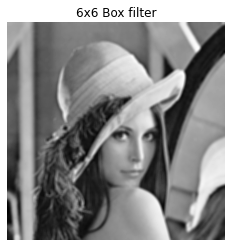

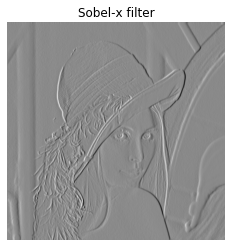

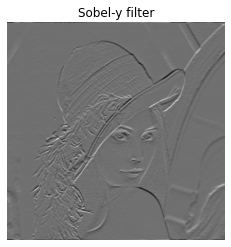

In [65]:
w1 = (1/36)*np.ones((6,6))   # Box  Filter
w2_x = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])  # Sobel-x filter
w2_y = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])  # Sobel-y filter
w3_x = np.array([[0,1],[-1,0]])  # Roberts-x filter
w3_y = np.array([[1,0],[0,-1]])  # Roberts-y filter

#Performing convolution operation on the grayscale lena image using different 
#combinations of filters and padding values
g1 = conv2(gray_image,w1,3)
g2_x = conv2(gray_image,w2_x,2) 
g2_y = conv2(gray_image,w2_y,1) 
g3_x = conv2(gray_image,w3_x,0) 
g3_y = conv2(gray_image,w3_y,1) 


plt.imshow(g1,cmap = 'gray')
plt.axis('off')
plt.title('6x6 Box filter')
plt.show()
plt.imshow(g2_x,cmap = 'gray')
plt.axis('off')
plt.title('Sobel-x filter')
plt.show()
plt.imshow(g2_y,cmap = 'gray')
plt.axis('off')
plt.title('Sobel-y filter')
plt.show()


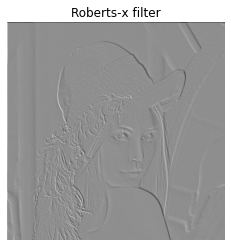

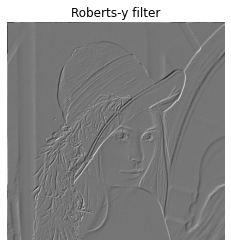

In [66]:

plt.imshow(g3_x,cmap = 'gray')
plt.axis('off')
plt.title('Roberts-x filter')
plt.show()
plt.imshow(g3_y,cmap = 'gray')
plt.axis('off')
plt.title('Roberts-y filter')
plt.show()


(440, 440) (440, 440, 3)


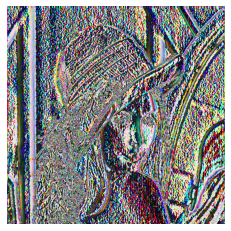

In [67]:
#convolution for color image
w = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
g = conv2(image,w,0)   
g_rgb = cv2.cvtColor(g, cv2.COLOR_BGR2RGB)
plt.imshow(g_rgb)
plt.axis('off')
plt.show()


 ## b) Applying convolution  to a 1024x1024 grey unit impulse image. 

In [68]:
#The impulse image will have all pixels values to be zero except for center which will have the value 1. 
#Here it is assumed that the image will have pixel value range [0,1]

impulse_img = np.zeros((1024,1024))  
impulse_img[512,512] = 1

#displaying a zoomed in version of the impulse image as a numpy matrix
print(impulse_img[508:517,508:517]) 


[[0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [69]:
w = 1/16*np.ones((4,4))
conv_impulse = conv2(impulse_img, w, pad = 0)
print(" Zoomed-in Impulse Image as a numpy matrix")
print(impulse_img[508:517,508:517])    
print("    Zoomed-in Convoluted Image as a numpy matrix")
print(conv_impulse[508:517,508:517])


 Zoomed-in Impulse Image as a numpy matrix
[[0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]]
    Zoomed-in Convoluted Image as a numpy matrix
[[0.     0.     0.     0.     0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.0625 0.0625 0.0625 0.0625 0.     0.    ]
 [0.     0.     0.     0.0625 0.0625 0.0625 0.0625 0.     0.    ]
 [0.     0.     0.     0.0625 0.0625 0.0625 0.0625 0.     0.    ]
 [0.     0.     0.     0.0625 0.0625 0.0625 0.0625 0.     0.    ]
 [0.     0.     0.     0.     0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     0.     0.     0.     0.    ]]


### When we perform convolution operation on a unit impulse image, we get the output in which the filter gets copied to the center of the image. 

## Problem 2: Implementing and testing the 2-D FFT and its inverse using a built-in 1-D FFT algorithm
## a) Implementing 2-D FFT using in-built 1-D FFT function

In [70]:
# Uses inbuilt numpy 1-D fft function to compute the 2-D fft.
def DFT2(f):    
    fft_matrix = np.zeros(f.shape,dtype = complex)  #initializing the result with complex np matrix
    for i in range(f.shape[0]):
        fft_matrix[i] = np.fft.fft(f[i])   #Applying 1-D fft to each row of the image
    fft_matrix = np.transpose(fft_matrix)    #Obtaining the transpose of the output 
                                             #of the intermediate step
    for j in range(f.shape[1]):
        fft_matrix[j] = np.fft.fft(fft_matrix[j])  #Applying 1-D fft to the rows of the Transposed matrix
                                                   #(i.e columns of original fft_matrix)
    fft_matrix = np.transpose(fft_matrix)  #Transposing back to get the correct matrix
    return fft_matrix
    

In [71]:
#Tranformation function to scale the pixels values
def image_scale(f,in_min,in_max,out_min,out_max):
    transformed_image = (out_max-out_min)*(f/(in_max-in_min))
    return transformed_image


In [72]:
image = cv2.imread('./lena.png')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)   #converting into grayscale image
scaled_image = image_scale(gray_image,0,255,0,1)  #scaling down the image to perform DFT2 operation


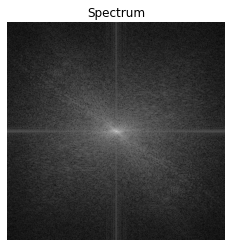

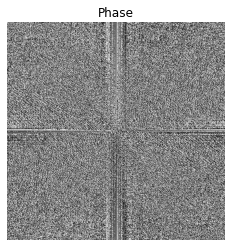

In [73]:
#fft of a gray scale image

fft_output = DFT2(scaled_image)   
fft_output_shift = np.fft.fftshift(fft_output)   
fft_output_log = np.log(1+np.abs(fft_output_shift))  
fft_output_phase = np.angle(fft_output_shift)

plt.imshow(fft_output_log,cmap = 'gray')
plt.axis('off')
plt.title('Spectrum')
plt.show()

plt.imshow(fft_output_phase,cmap = 'gray')
plt.axis('off')
plt.title('Phase')
plt.show()


In [74]:
wolves = cv2.imread('./wolves.png')
gray_wolves = cv2.cvtColor(wolves, cv2.COLOR_BGR2GRAY)   #converting into grayscale image
scaled_wolves = image_scale(gray_wolves,0,255,0,1)  #scaling down the image to perform DFT2 operation


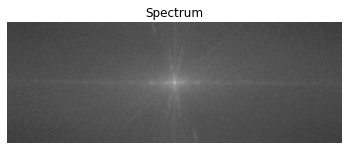

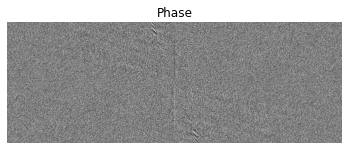

In [75]:
#fft of a gray scale image

fft_output_w = DFT2(scaled_wolves)   
fft_output_shift_w = np.fft.fftshift(fft_output_w)   
fft_output_log_w = np.log(1+np.abs(fft_output_shift_w))  
fft_output_phase_w = np.angle(fft_output_shift_w)

plt.imshow(fft_output_log_w,cmap = 'gray')
plt.axis('off')
plt.title('Spectrum')
plt.show()

plt.imshow(fft_output_phase_w,cmap = 'gray')
plt.axis('off')
plt.title('Phase')
plt.show()


## b) IDFT2 using DFT2 function

In [76]:
#Using the DFT2 function to create IDFT2 which will output the original image back
def IDFT2(F):
    f_conj = np.imag(F) + complex('j')*np.real(F)
    ifft_conj = DFT2(f_conj)
    ifft_img = np.imag(ifft_conj) + complex('j')*np.real(ifft_conj)
    ifft_img = ifft_img/(F.shape[0]*F.shape[1])                             
    return np.real(ifft_img)


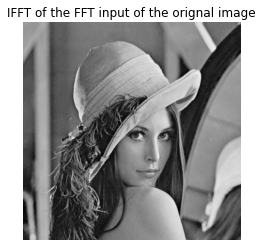

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


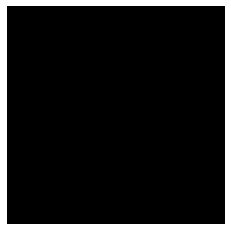

In [77]:
ifft_output = IDFT2(fft_output)   #fft_output is the output of the DFT2 function
plt.imshow(ifft_output,cmap = 'gray')
plt.axis('off')
plt.title("IFFT of the FFT input of the orignal image")
plt.show()
#printing the difference between the output of the IDFT2 function and the original scaled down image 
#to ensure that we got back the original image
print((scaled_image - ifft_output).astype(np.uint8))
plt.imshow((scaled_image - ifft_output).astype(np.uint8),cmap = 'gray')
plt.axis('off')
plt.show()


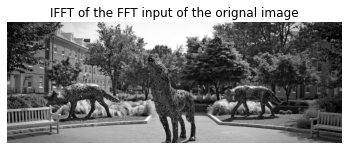

In [78]:
ifft_output_w = IDFT2(fft_output_w)   #fft_output is the output of the DFT2 function
plt.imshow(ifft_output_w,cmap = 'gray')
plt.axis('off')
plt.title("IFFT of the FFT input of the orignal image")
plt.show()


In [79]:
#printing the difference between the output of the IDFT2 function 
#and the original scaled down image to ensure that we got back the original image
print((scaled_wolves - ifft_output_w).astype(np.uint8))


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


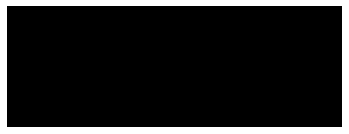

In [80]:
plt.imshow((scaled_wolves - ifft_output_w).astype(np.uint8),cmap = 'gray')
plt.axis('off')
plt.show()
